In [24]:
import pandas as pd

sido = pd.read_csvr('data\시도지역코드.csv', encoding='EUC_kr')
sido.head()

 # 시도지역코드 불러오기

In [25]:
sido = pd.read_csv('data\시도지역코드.csv', encoding='EUC_kr')
sido.head()

,시도지역코드,지역명
0,11,서울
1,26,부산
2,27,대구
3,28,인천
4,29,광주


In [26]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도지역코드  17 non-null     int64 
 1   지역명     17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [27]:
# sido['코드']=sido['시도지역코드']+10
# sido.head()

# 시도별 진료정보 불러오기

In [28]:
import os

path = 'data/'
file_list = os.listdir(path)
file_list

df=pd.DataFrame()
keywords =['감기','눈병','천식','피부염']

for i in file_list:
    if i.endswith('_시도.csv'):
        #print(i)
        data = pd.read_csv(path+i, encoding='euc_kr')

        # if '감기' in i:
        #     data['구분']='감기'
        # elif '눈병' in i:
        #     data['구분']='눈병'
        # elif '천식' in i:
        #     data['구분']='천식'
        # elif '피부염' in i:
        #     data['구분']='피부염'

        for key in keywords:
            if key in i:
                data['구분'] = key
                break

        df = pd.concat([df,data])

In [29]:
df.head()
df.shape

(141588, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141588 entries, 0 to 35396
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.4+ MB


In [31]:
df.columns

Index(['날짜', '시도지역코드', '발생건수(건)', '구분'], dtype='object')

In [32]:
sido.columns

Index(['시도지역코드', '지역명'], dtype='object')

In [33]:
# 시도 지코드의 지역명 표시
data_merge = pd.merge(df , sido , how='left', on = '시도지역코드')

In [34]:
data_merge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명
0,2023-10-01,11.0,17218.0,감기,서울
1,2023-10-01,26.0,5699.0,감기,부산
2,2023-10-01,27.0,3590.0,감기,대구
3,2023-10-01,28.0,7524.0,감기,인천
4,2023-10-01,29.0,3044.0,감기,광주


In [35]:
data_merge['지역명'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '전국', nan], dtype=object)

In [36]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141588 entries, 0 to 141587
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
 4   지역명      10264 non-null   object 
dtypes: float64(2), object(3)
memory usage: 5.4+ MB


In [37]:
data_merge['년/월'] = data_merge['날짜'].str[:7]
data_merge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10


In [38]:
dfdata = data_merge[data_merge['지역명'] !='전국']

In [39]:
dfdata

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
141583,NaN,NaN,NaN,피부염,NaN,NaN
141584,NaN,NaN,NaN,피부염,NaN,NaN
141585,NaN,NaN,NaN,피부염,NaN,NaN
141586,NaN,NaN,NaN,피부염,NaN,NaN


## 결측값 행/열 삭제
* 변수명.dropna(axis=0/1, how='any'/'all')

In [40]:
dfdata.isnull().sum()

날짜         131324
시도지역코드     131324
발생건수(건)    131324
구분              0
지역명        131324
년/월        131324
dtype: int64

In [41]:
dfdata.dropna(axis=0, how='any',inplace=True)

C:\Users\jwpyu\AppData\Local\Temp\ipykernel_13428\1024979920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata.dropna(axis=0, how='any',inplace=True)


In [42]:
# 년/월, 구분별 발생건수의 평균

yearmonthdf = dfdata.groupby(['년/월','구분'],as_index=False)[['발생건수(건)']].mean()

In [43]:
dfdata['년/월'].unique()

array(['2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype=object)

In [44]:
yearmonthdf.head()

,년/월,구분,발생건수(건)
0,2023-10,감기,29373.596349
1,2023-10,눈병,2077.245436
2,2023-10,천식,1099.300203
3,2023-10,피부염,2833.022312
4,2023-11,감기,35412.163866


       년/월   구분       발생건수(건)
0  2023-10   감기  29373.596349
1  2023-10   눈병   2077.245436
2  2023-10   천식   1099.300203
3  2023-10  피부염   2833.022312


<Axes: title={'center': '2023-10 현황'}, xlabel='구분'>

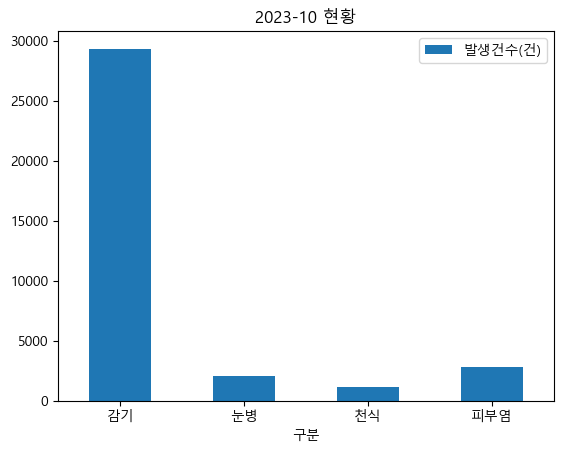

In [45]:
import matplotlib as plt
plt.rc('font',family='malgun gothic')

yearmonthin = input('조회 년/월 입력>> ')
yearmonthsearch = yearmonthdf[yearmonthdf['년/월']==yearmonthin]
print(yearmonthsearch)
yearmonthsearch.plot(kind='bar', x='구분', rot=0, title=yearmonthin+' 현황')